# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [15]:
import pandas as pd
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt


# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [25]:
# Your code here
mu, sigma = 50, 5 #mean,  

sample_size = pd.Series([10, 50, 500, 5000, 50000])

dists = sample_size.apply(lambda s: np.random.normal(mu, sigma, s))

tests = dists.apply(lambda d: stats.normaltest(d))

tests

0    (2.3093421287531397, 0.3151611875969993)
1      (1.11022468417716, 0.5740077723420915)
2     (2.686983612080495, 0.2609329487408659)
3    (1.2767047980042168, 0.5281619076514221)
4    (2.198775352782335, 0.33307497093744015)
dtype: object

#### Interpret the normaltest results and make your observations.

In [26]:
# These tuples enclose the value representing the skewness and the kurtosis values for different samples. 
# The closer to 0, the more similar to a normal distribution. 
# Skewness indicates asymetry in the model showing the median is higher/smaller than the mean. 
# On the other hand, kurtosis shows how values' concentration are away from the mean. 

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

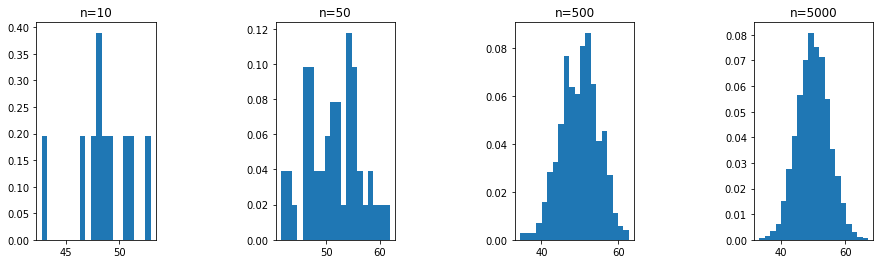

In [27]:
# Your code here
f, ax = plt.subplots(1, 4)

f.set_figwidth(15)

f.subplots_adjust(wspace=1)

for i in range(0, 4):
    ax[i].set_title('n=%s' % (sample_size[i]))
    count, bins, ignored = ax[i].hist(dists[i], 20, density=True)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [28]:
#The larger the sample, the more normal shape tends to have. 


# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

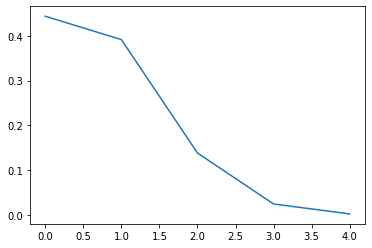

In [29]:
# Your code here
from scipy.stats import binom

n, p = 5, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Explain what you observe from the plot above

In [ ]:
#Every time a user watches a video the probability that he/she makes click, decreases.

#### Now plot PMP with 50, 500, and 5000 visitors.

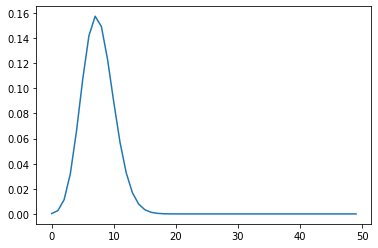

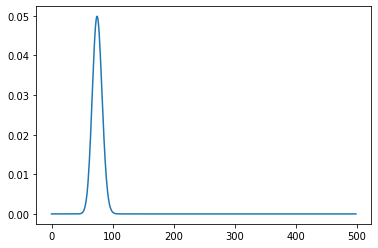

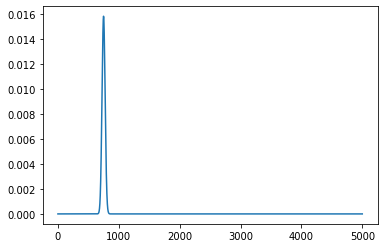

In [33]:
# Your code here
from scipy.stats import binom

n, p = 50, 0.15
x = range(n)
dist = binom(n, p)
fig, ax = plt.subplots(1, 1)
plt.plot(x, dist.pmf(x))
plt.show()


n, p = 500, 0.15
x = range(n)
dist = binom(n, p)
fig, ax = plt.subplots(1, 1)
plt.plot(x, dist.pmf(x))
plt.show()

n, p = 5000, 0.15
x = range(n)
dist = binom(n, p)
fig, ax = plt.subplots(1, 1)
plt.plot(x, dist.pmf(x))
plt.show()

#### What did you notice from the distribution plots? Comment your findings.

In [ ]:
#The larger the sample, the lower the probability


# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [ ]:
# Your comment here

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [ ]:
# Your code here

#### What is the probability of getting 60 visits?

In [ ]:
# Your code here

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

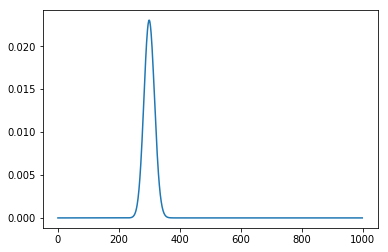

In [115]:
# your code here
from scipy.stats import poisson

N = np.arange(1000)

rv = poisson(300)

arr = []

for n in N:
    arr.append(rv.pmf(n))

plt.plot(arr)